In [1]:
import tensorflow as tf
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Dropout, Flatten, MaxPooling2D
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [3]:
def load_dataset(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
train = train.sample(frac=1).reset_index(drop=True)
train.head()


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,train\neutral\2104.jpg,neutral
1,train\happy\10035.jpg,happy
2,train\neutral\3098.jpg,neutral
3,train\fear\15573.jpg,fear
4,train\happy\232.jpg,happy


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,test\angry\10052.jpg,angry
1,test\angry\10065.jpg,angry
2,test\angry\10079.jpg,angry
3,test\angry\10095.jpg,angry
4,test\angry\10121.jpg,angry


In [6]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [7]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [8]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
x_train = train_features/255.0
x_test = test_features/255.0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [11]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [12]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [13]:
input_shape = (48,48,1)
output_class = 7

In [14]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [17]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 549s 2s/step - loss: 1.8238 - accuracy: 0.2426 - val_loss: 1.8117 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 555s 2s/step - loss: 1.7999 - accuracy: 0.2485 - val_loss: 1.7667 - val_accuracy: 0.2753
Epoch 3/100
226/226 [==============================] - 570s 3s/step - loss: 1.6986 - accuracy: 0.3026 - val_loss: 1.5987 - val_accuracy: 0.3590
Epoch 4/100
226/226 [==============================] - 605s 3s/step - loss: 1.5681 - accuracy: 0.3813 - val_loss: 1.4331 - val_accuracy: 0.4574
Epoch 5/100
226/226 [==============================] - 785s 3s/step - loss: 1.4694 - accuracy: 0.4312 - val_loss: 1.3657 - val_accuracy: 0.4782
Epoch 6/100
226/226 [==============================] - 608s 3s/step - loss: 1.4146 - accuracy: 0.4555 - val_loss: 1.3088 - val_accuracy: 0.5013
Epoch 7/100
226/226 [==============================] - 533s 2s/step - loss: 1.3744 - accuracy: 0.4716 - val_loss: 1.2585 - val_accuracy:

KeyboardInterrupt: 

In [18]:
model_json = model.to_json()
with open("facialemotionmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save('facialemotionmodel.h5')

In [19]:
import random

In [20]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)

Original Output: neutral
1/1 [==============================] - 2s 2s/step
Predicted Output: neutral


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Original Output: happy
1/1 [==============================] - 0s 51ms/step
Predicted Output: happy


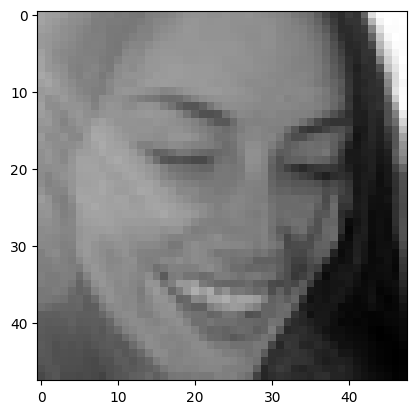

In [23]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: fear
1/1 [==============================] - 0s 28ms/step
Predicted Output: fear


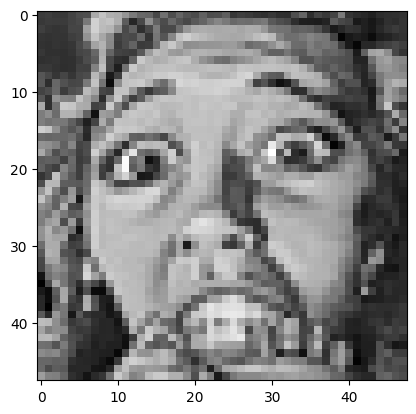

In [24]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 [==============================] - 0s 50ms/step
Predicted Output: angry


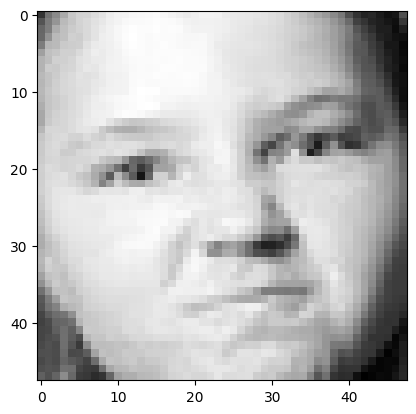

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 47ms/step
Predicted Output: sad


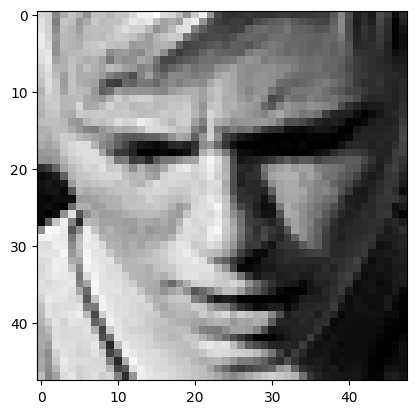

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');